## Exercise 12.1


In [1]:
#starting procedure
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' 
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

### I) loading and processing MNIST data


In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 8


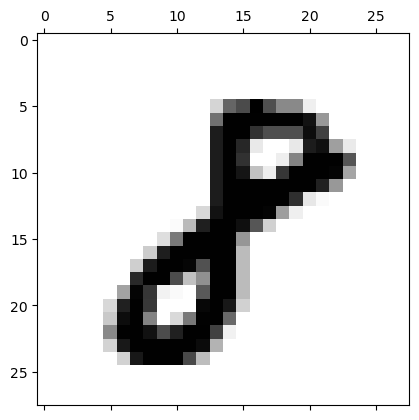

... and with label [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# RESHAPE OH THE DATA, it could depend on Keras backend
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[31])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[31,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[31], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

 ### II) Defining different model with different optimizers
 

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [5]:
#TESTING DIFFERENT OPTIMIZERS

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_modelADAM(): #ADAM
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model
    
def compile_modelSGD():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model
    
def compile_modelADAGRAD():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


 ### III) Training the models

In [6]:
# training parameters
batch_size = 32
epochs = 10 # 7, 15, 

# create the deep neural net
model_DNN1 = compile_modelADAM()
model_DNN2 = compile_modelADAGRAD()
model_DNN3 = compile_modelSGD()

In [7]:
# train DNN and store training info in history
history = model_DNN1.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2744 - acc: 0.9211 - val_loss: 0.1020 - val_acc: 0.9683
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1204 - acc: 0.9654 - val_loss: 0.0969 - val_acc: 0.9700
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0852 - acc: 0.9740 - val_loss: 0.0784 - val_acc: 0.9780
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0666 - acc: 0.9805 - val_loss: 0.0773 - val_acc: 0.9778
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0560 - acc: 0.9829 - val_loss: 0.0730 - val_acc: 0.9798
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0443 - acc: 0.9863 - val_loss: 0.0730 - val_acc: 0.9806
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0399 - acc: 0.9877 - val_loss: 0.0913 - val_acc: 0.9763
Epoch 8/10
1875/1875 [==============================] -

In [29]:
history = model_DNN2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2846 - acc: 0.6275 - val_loss: 0.6356 - val_acc: 0.8602
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7079 - acc: 0.7990 - val_loss: 0.4525 - val_acc: 0.8884
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5779 - acc: 0.8351 - val_loss: 0.3806 - val_acc: 0.9018
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5132 - acc: 0.8537 - val_loss: 0.3437 - val_acc: 0.9101
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4724 - acc: 0.8661 - val_loss: 0.3188 - val_acc: 0.9152
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4397 - acc: 0.8762 - val_loss: 0.3001 - val_acc: 0.9180
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4214 - acc: 0.8804 - val_loss: 0.2851 - val_acc: 0.9219
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

In [30]:
history = model_DNN3.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7665 - acc: 0.7729 - val_loss: 0.3153 - val_acc: 0.9130
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3876 - acc: 0.8886 - val_loss: 0.2394 - val_acc: 0.9325
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3107 - acc: 0.9119 - val_loss: 0.2000 - val_acc: 0.9423
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2645 - acc: 0.9259 - val_loss: 0.1744 - val_acc: 0.9481
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2350 - acc: 0.9340 - val_loss: 0.1584 - val_acc: 0.9528
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2064 - acc: 0.9415 - val_loss: 0.1423 - val_acc: 0.9578
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1876 - acc: 0.9468 - val_loss: 0.1296 - val_acc: 0.9600
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

### IV) Evaluate the Models Performances 

313/313 [==============================] - 0s 2ms/step - loss: 0.0916 - acc: 0.9795
Model DNN 1 - Test loss: 0.0916217640042305 - Test accuracy: 0.9794999957084656


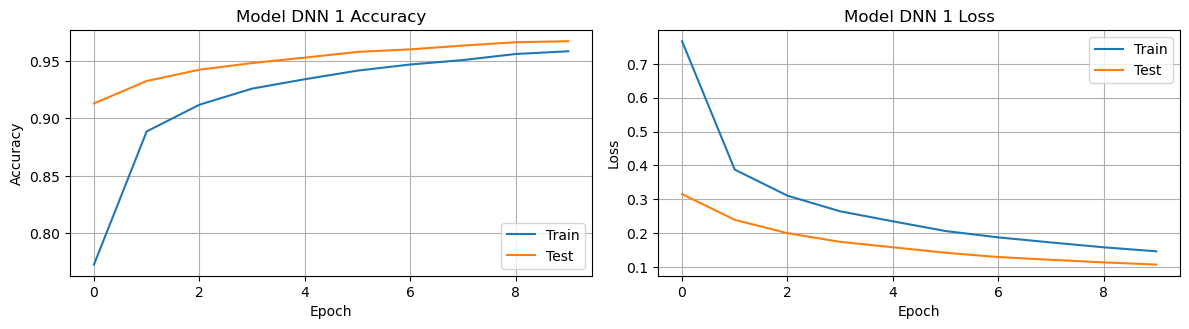

313/313 [==============================] - 1s 2ms/step - loss: 0.2541 - acc: 0.9294
Model DNN 2 - Test loss: 0.2541210353374481 - Test accuracy: 0.9294000267982483


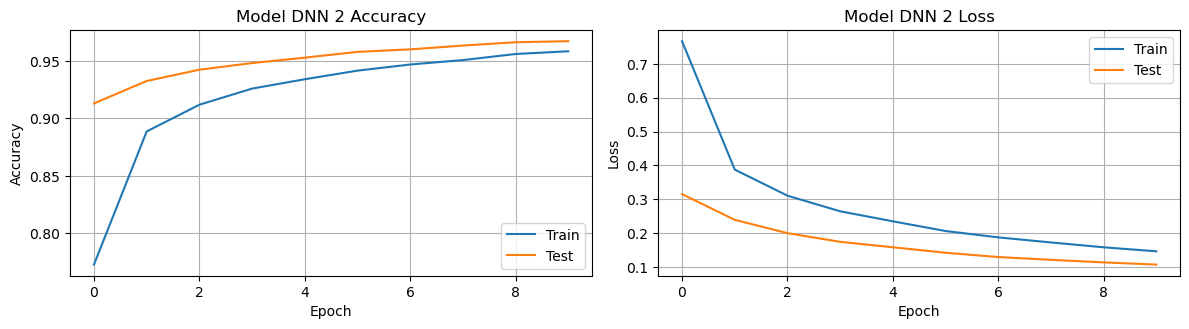

313/313 [==============================] - 0s 1ms/step - loss: 0.1074 - acc: 0.9671
Model DNN 3 - Test loss: 0.10741452872753143 - Test accuracy: 0.9671000242233276


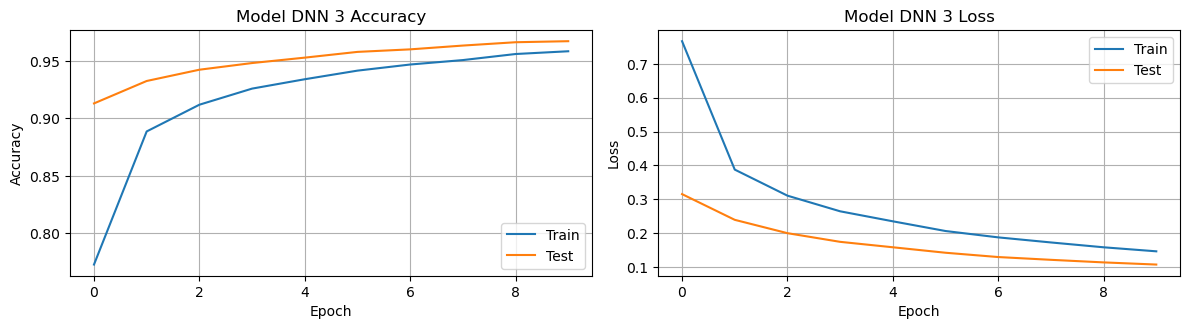

In [31]:
import matplotlib.pyplot as plt

# Funzione per plottare la storia di addestramento
def plot_training_history(history, model_name):
    # Plot dell'accuratezza
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.grid(True)

    # Plot della loss
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.grid(True)

    # Mostra i grafici
    plt.tight_layout()
    plt.show()

# Esempio di utilizzo per tre modelli diversi
models = [model_DNN1, model_DNN2, model_DNN3]
model_names = ['Model DNN 1', 'Model DNN 2', 'Model DNN 3']

for model, name in zip(models, model_names):
    # Evaluate model
    score = model.evaluate(X_test, Y_test, verbose=1)
    print(f'{name} - Test loss: {score[0]} - Test accuracy: {score[1]}')

    # Plot history
    plot_training_history(history, name)


313/313 [==============================] - 0s 1ms/step


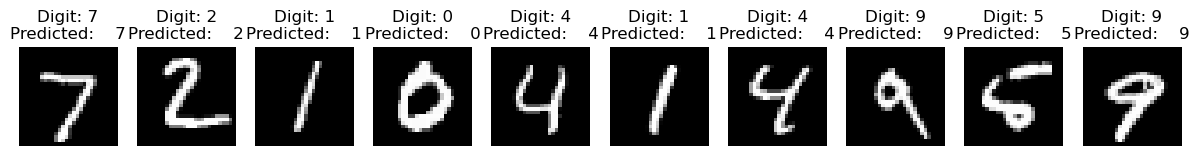

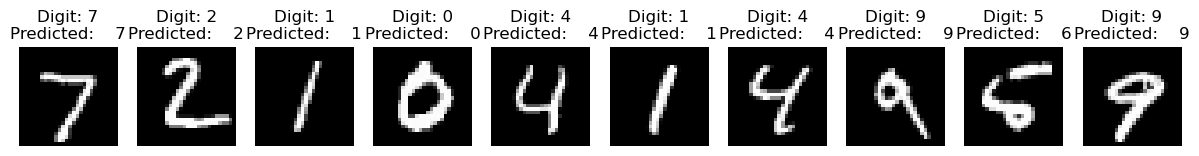

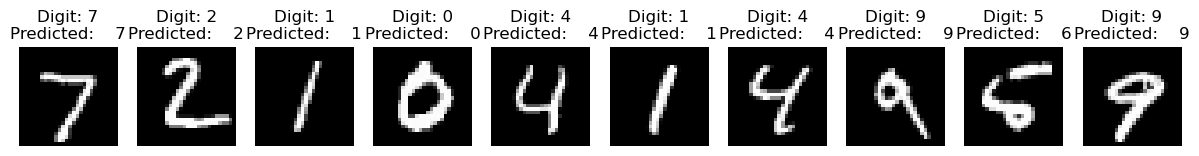

In [32]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions1 = model_DNN1.predict(X_test)
predictions2 = model_DNN2.predict(X_test)
predictions3 = model_DNN3.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions1[i])))    
    plt.axis('off') 
plt.show()
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions2[i])))    
    plt.axis('off') 
plt.show()
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions3[i])))    
    plt.axis('off') 
plt.show()

## Exercise 12.2

In [6]:
#Starting procedure for CNN
from keras.layers import Flatten, Conv2D, MaxPooling2D
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


### I) Creazione della CNN

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


#FUNZIONE PER CREARE MODELLI
def create_CNN(input_shape=(28, 28, 1), num_classes=10):
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    # add MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # add Dropout layer
    model.add(Dropout(0.25))
    # add second convolutional layer with 20 filters
    model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
    # add MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # add Dropout layer
    model.add(Dropout(0.25))
    # flatten the output for Dense layer
    model.add(Flatten())
    # add a standard Dense layer
    model.add(Dense(128, activation='relu'))
    # add Dropout layer
    model.add(Dropout(0.5))
    # add softmax layer for the final output
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='SGD',
              metrics=['acc'])
    return model



In [33]:
# create the deep conv net
model_CNN=create_CNN()

### II) Training della NN 

In [47]:
# training parameters
batch_size = 32
epochs = 5

# train CNN
history = model_CNN.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.3433 - acc: 0.8945 - val_loss: 0.1294 - val_acc: 0.9611
Epoch 2/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.2688 - acc: 0.9179 - val_loss: 0.1052 - val_acc: 0.9668
Epoch 3/5
1875/1875 [==============================] - 622s 332ms/step - loss: 0.2287 - acc: 0.9316 - val_loss: 0.0874 - val_acc: 0.9715
Epoch 4/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0687 - acc: 0.9777

Test loss: 0.06869660317897797
Test accuracy: 0.9776999950408936


#### III) Evaluate the Models Performances 

313/313 [==============================] - 2s 5ms/step - loss: 0.0687 - acc: 0.9777

Test loss: 0.06869660317897797
Test accuracy: 0.9776999950408936


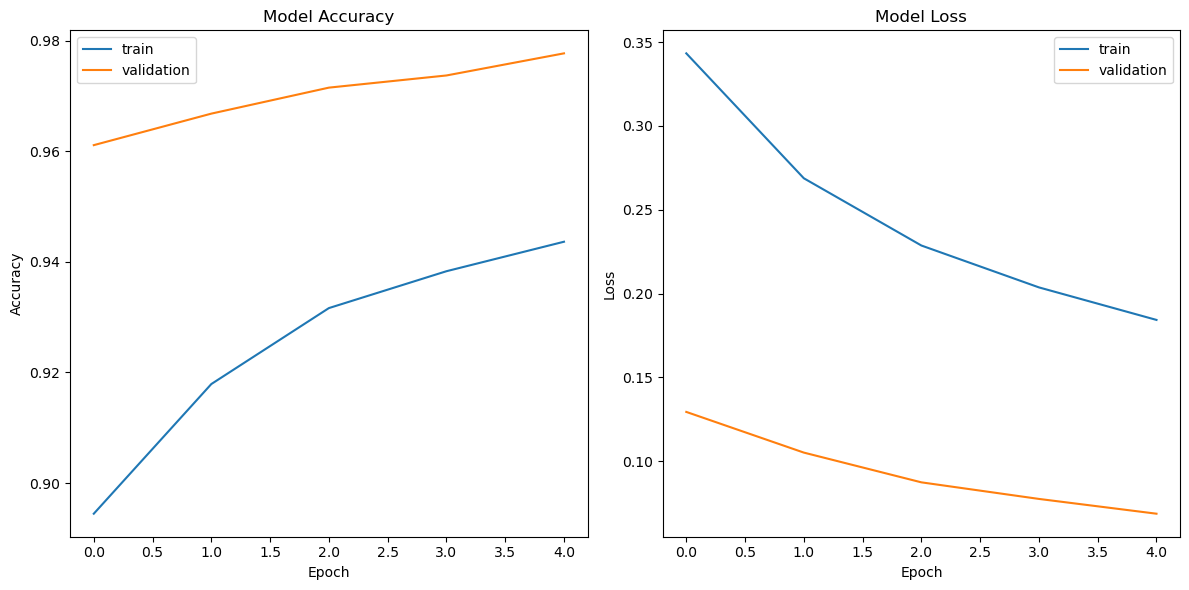

In [48]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# Stampa delle prestazioni del modello
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Visualizzazione della storia di addestramento
plt.figure(figsize=(12, 6))

# Sommario della storia per l'accuratezza
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')

# Sommario della storia per la loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')

plt.tight_layout()
plt.show()

313/313 [==============================] - 2s 5ms/step


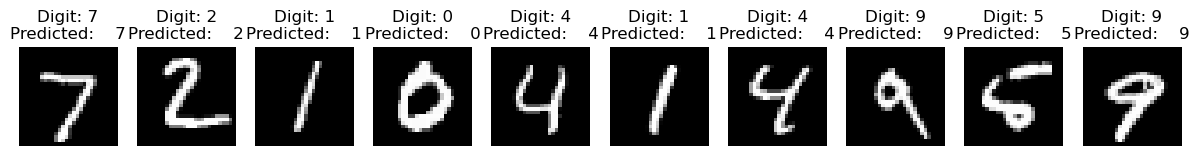

In [49]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
predictions = model_CNN.predict(X_test)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Exercise 12.3
Alcuni test sui numeri b.png:

In [57]:
from PIL import Image
import os

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 46ms/step


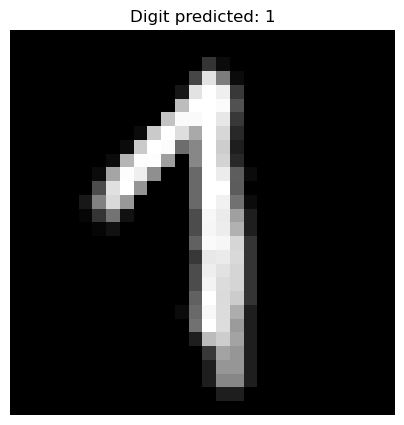

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 80ms/step


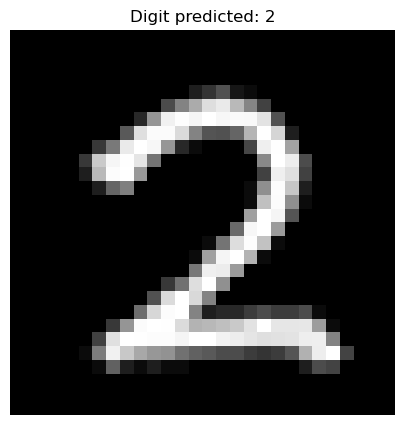

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 71ms/step


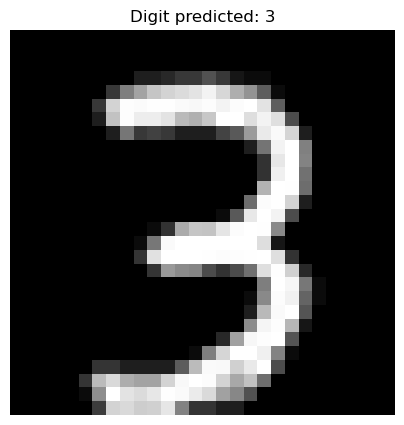

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 59ms/step


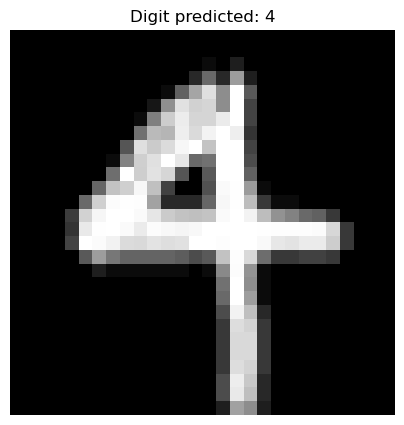

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 83ms/step


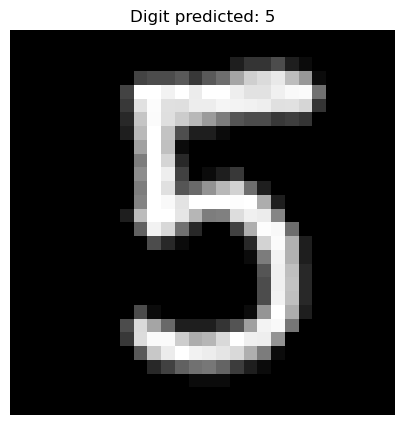

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 70ms/step


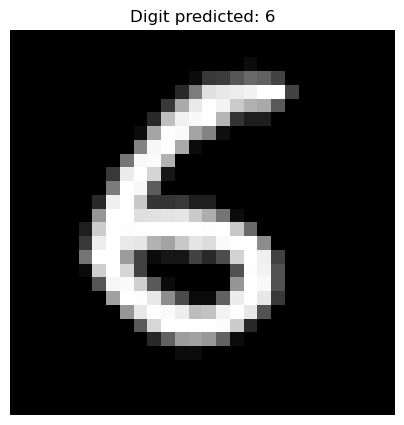

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 66ms/step


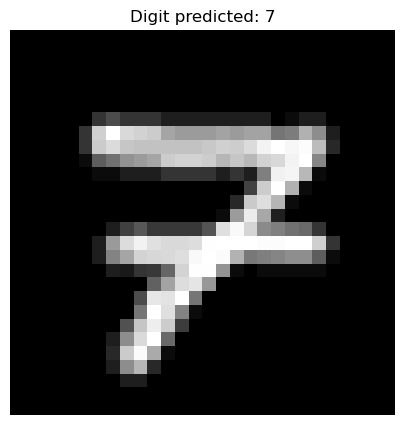

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step


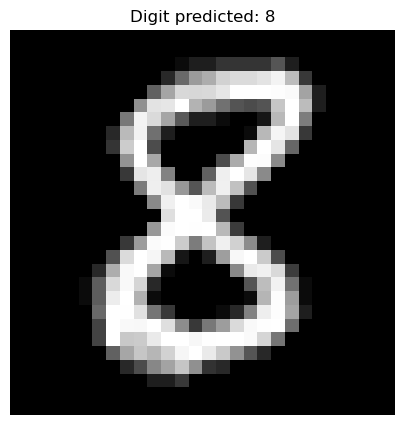

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 66ms/step


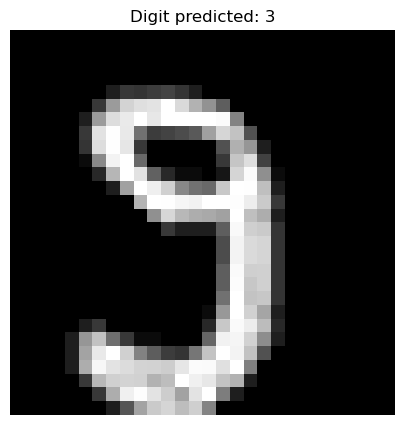

In [58]:
# Funzione per processare e prevedere un'immagine
def process_and_predict(digit_filename, model):
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    print(f"Image size: {xdim}x{ydim}")
    
    pix = digit_in.load()
    data = np.zeros((xdim, ydim))
    
    for j in range(ydim):
        for i in range(xdim):
            data[i, j] = pix[j, i]
    
    data /= 255
    
    # plt.figure(figsize=(5, 5))
    # plt.imshow(data, cmap='gray')
    # plt.show()
    
    print(data.shape)
    
    data = data.reshape(1, xdim, ydim, 1)
    print(data.shape)
    
    pred_0 = model_CNN.predict(data)
    
    data = data.reshape(xdim, ydim)
    
    plt.figure(figsize=(5, 5))  
    plt.imshow(data, cmap='gray')    
    plt.title(f"Digit predicted: {np.argmax(pred_0)}")
    plt.axis('off')
    plt.show()

# Itera attraverso i numeri da 1 a 9
for digit in range(1, 10):
    digit_filename = f"./{digit}b.png"
    process_and_predict(digit_filename, model_CNN)